# Imports

In [1]:
import os

os.chdir("/home/ivanr/git/document_information_extraction/")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [3]:
from src.data.wikipedia.wiki_data_base import retrieve_query

# Statics

In [4]:
from src.data.data_statics import SQL_WIKI_DUMP,TEMP_DB

# Read data

In [5]:
query = """
    SELECT *
    FROM wiki_article_novelty
"""

In [6]:
novelty_df = retrieve_query(query, out_f=SQL_WIKI_DUMP)
novelty_df = pd.DataFrame(
    novelty_df,
    columns=["pageid", "novelty_tokens", "novelty_bigrams", "novelty_trigrams"],
)

In [7]:
len(novelty_df)

1424051

# Evaluate distribution

In [8]:
novelty_df[["novelty_tokens", "novelty_bigrams", "novelty_trigrams"]] = novelty_df[
    ["novelty_tokens", "novelty_bigrams", "novelty_trigrams"]
].astype(float)

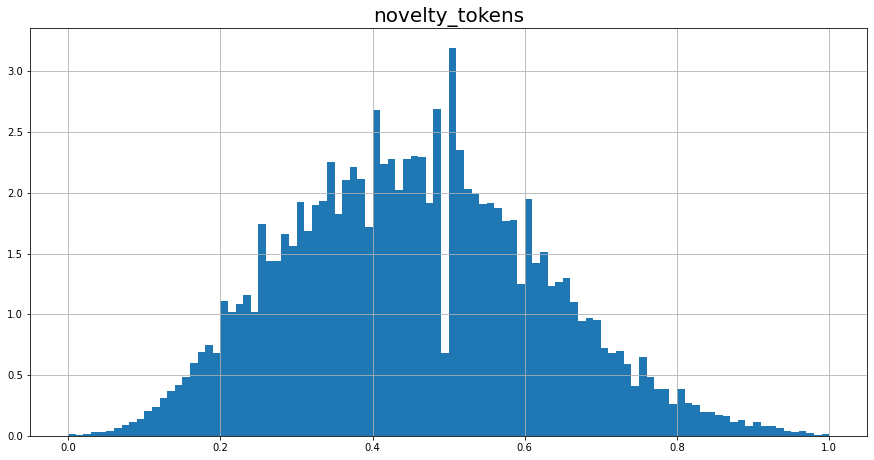

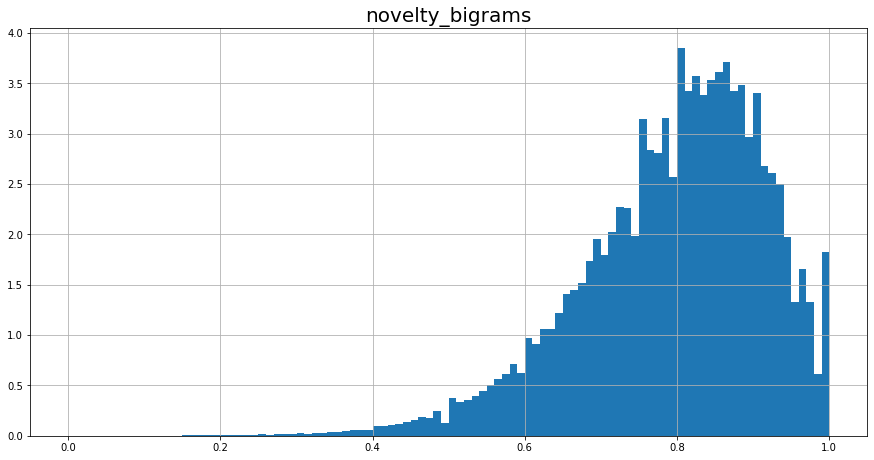

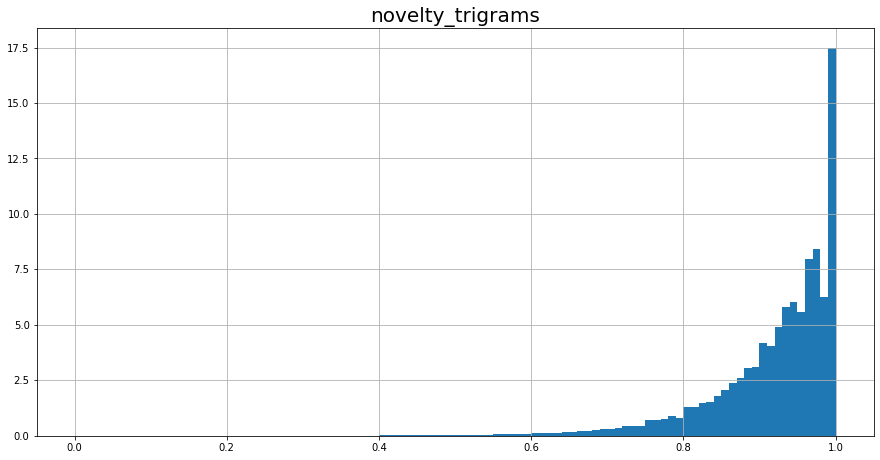

In [9]:
for var in ["novelty_tokens", "novelty_bigrams", "novelty_trigrams"]:
    plt.figure(figsize=(15, 7.5))
    plt.title(var, fontsize=20)
    novelty_df[var].hist(bins=100, density=True)
    plt.show()

In [10]:
novelty_df.describe()

,pageid,novelty_tokens,novelty_bigrams,novelty_trigrams
count,1.424051e+06,1.424051e+06,1.424051e+06,1.424051e+06
mean,2.515004e+07,4.563613e-01,7.949752e-01,9.192736e-01
std,2.129883e+07,1.661923e-01,1.212887e-01,8.571314e-02
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.582285e+06,3.333333e-01,7.241379e-01,8.863636e-01
50%,2.107890e+07,4.509804e-01,8.125000e-01,9.431818e-01
75%,4.282306e+07,5.714286e-01,8.837209e-01,9.782609e-01
max,6.876322e+07,1.000000e+00,1.000000e+00,1.000000e+00


# Semantic similarity

In [11]:
query = """
    SELECT *
    FROM wiki_article_cosine_similarity
"""

In [12]:
semantic_sim_df = retrieve_query(query, out_f=TEMP_DB)  # SQL_WIKI_DUMP
semantic_sim_df = pd.DataFrame(
    semantic_sim_df,
    columns=["pageid", "semantic_similarity"],
)

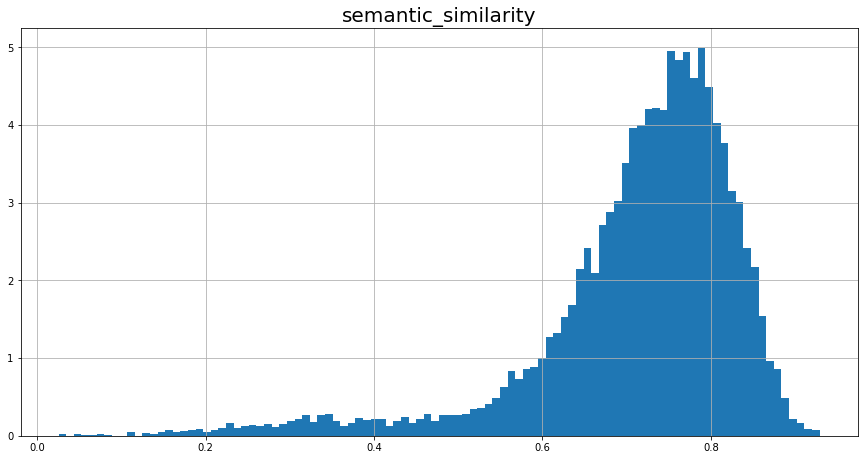

In [13]:
plt.figure(figsize=(15, 7.5))
plt.title("semantic_similarity", fontsize=20)
semantic_sim_df["semantic_similarity"].hist(bins=100, density=True)
plt.show()

## Compare correlation

In [14]:
full_df = novelty_df.merge(semantic_sim_df)

In [15]:
full_df.describe()

,pageid,novelty_tokens,novelty_bigrams,novelty_trigrams,semantic_similarity
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,25089.773273,0.419163,0.782379,0.924366,0.714255
std,14275.690946,0.156885,0.111414,0.076793,0.123517
min,12.000000,0.000000,0.050000,0.082707,0.025379
25%,12629.750000,0.304626,0.716130,0.896354,0.671937
50%,24901.000000,0.402174,0.791586,0.943089,0.740901
75%,37420.250000,0.516797,0.860811,0.975610,0.793184
max,50137.000000,1.000000,1.000000,1.000000,0.929071


In [16]:
for var in ["novelty_tokens", "novelty_bigrams", "novelty_trigrams"]:
    corr, pval = pearsonr(full_df["semantic_similarity"],full_df[var])
    print(f"{var} has a correlation of {corr:.3f} with p-value {pval:.3f}")

novelty_tokens has a correlation of -0.544 with p-value 0.000
novelty_bigrams has a correlation of -0.433 with p-value 0.000
novelty_trigrams has a correlation of -0.279 with p-value 0.000


In [17]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm


def plot_joint(data, x_label, y_label, bins=(100, 100)):

    x = data[x_label]
    y = data[y_label]
    ax1 = sns.jointplot(x=x, y=y)
    ax1.ax_joint.cla()
    plt.sca(ax1.ax_joint)

    plt.hist2d(x, y, bins=bins, cmap=cm.jet, norm=LogNorm())
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)

    cbar_ax = ax1.fig.add_axes([1, 0.1, 0.03, 0.7])
    cb = plt.colorbar(cax=cbar_ax)
    cb.set_label(r"$\log_{10}$ density of points", fontsize=13)
        
    plt.show()

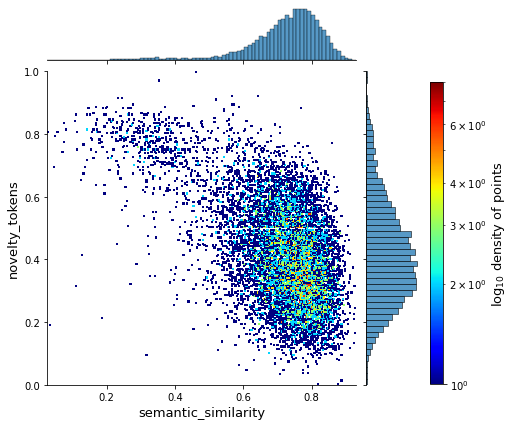

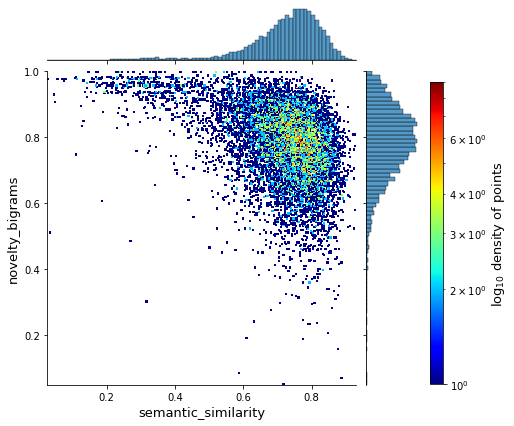

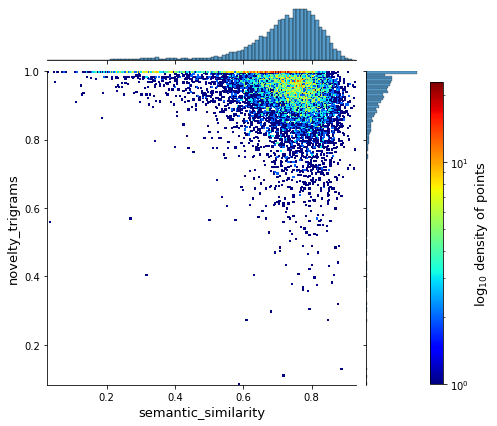

In [18]:
for var in ["novelty_tokens", "novelty_bigrams", "novelty_trigrams"]:
    plot_joint(
        full_df,
        "semantic_similarity",
        var,
        bins=(250, 250),
    )